In [1]:
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
PATH = 'C:\\Users\\user\\Downloads\\weareable_device_2020\\'

In [51]:
dirlist = []
for dirPath, dirNames, fileNames in os.walk("C:\\Users\\user\\Downloads\\drive-download-20200128T141241Z-001\\"):
    dirlist.append(dirNames)
    break
dirlist = dirlist[0]

In [52]:
dirlist = dirlist[3:]

['Dr黃O玉(0450)',
 'index_李O哲(0386)',
 '劉恩惠(045F)',
 '卓季璇(0617)',
 '吳佳鉛(03D3)',
 '吳宛靜(067F)',
 '吳葦婷(0564)',
 '呂美雲(00B6)',
 '張暖琪(01D9)',
 '張雅欣(031F)',
 '方海屏(0599)',
 '曾稚珺(04F9)',
 '李軍毅(0411)',
 '林晉慶(017A)',
 '林鈺瑄(07D7)',
 '歐鳳娟(0436)',
 '江佩蓉(0057)',
 '王怡媜(01C2)',
 '簡彤涓(05A3)',
 '許芳瑜(030C)',
 '趙心儀(00CE)',
 '郭真伶(069E)',
 '陳毓喜(0467)',
 '陳芳慈(04D5)',
 '陳貞樺(0421)',
 '高珮蓉(0609)',
 '黃筱婷(042E)']

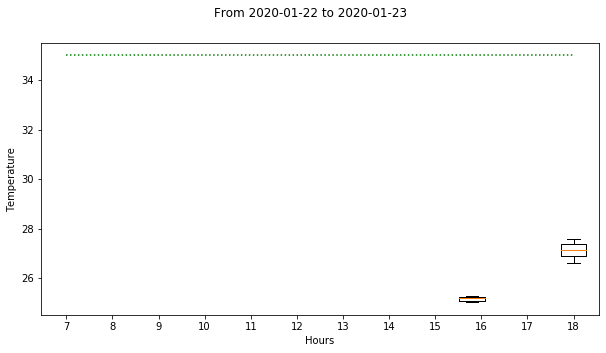

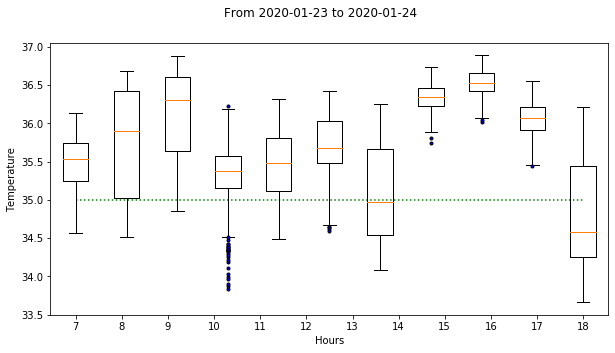

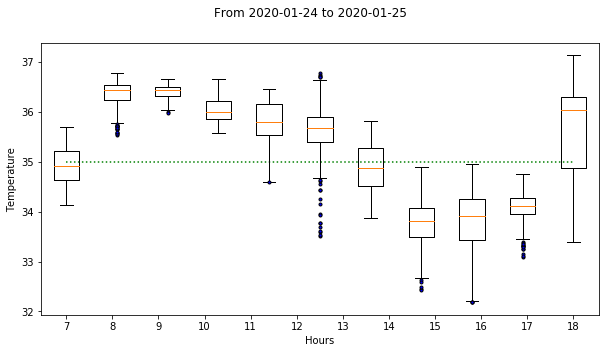

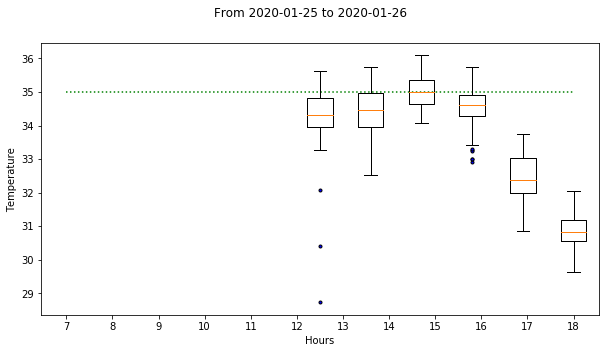

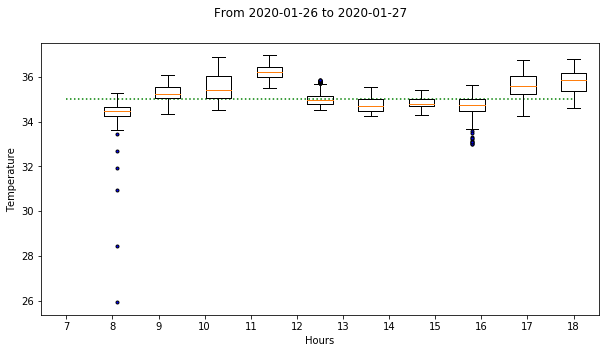

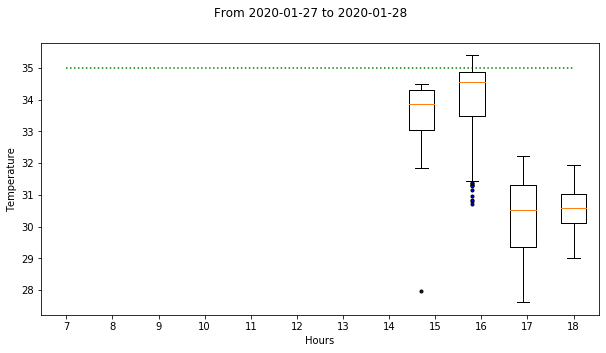

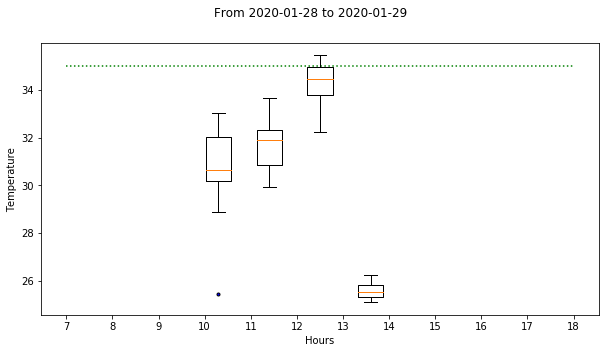

In [54]:
for pid in range(75,76):
    df = pd.read_csv(PATH+str(pid)+'\\'+str(pid)+'.csv', header = None)
    df[0] = [datetime.datetime.strptime(i, '%Y-%m-%d') for i in df[0].values]
    df[1] = [datetime.datetime.strptime(i, '%H:%M:%S').time() for i in df[1].values]
    
    date_list = list(dict.fromkeys(df[0].values))
    hour_list = np.arange(8,19) 
    for d_idx in range(len(date_list)):
        date = df[0].values
        d_filter = (date>=date_list[d_idx])&(date<(date_list[d_idx]+np.timedelta64(1,'D')))
        time_zone = 'From '+np.datetime_as_string(date_list[d_idx], unit = 'D')+' to '+np.datetime_as_string(date_list[d_idx]+np.timedelta64(1,'D'), unit = 'D')
        
        data = (df[3].values)[d_filter] #each date data
        hour = (df[1].values)[d_filter] #each date each hour
        
        each_hour = []
        for h_idx in hour_list:
            h_filter = (hour>=datetime.time(hour = h_idx))&(hour<datetime.time(hour = h_idx+1))
            tmp = data[(h_filter)&(data>25)&(data<45)]
            
            each_hour.append(tmp)
        
        plt.figure(figsize = (10,5))
        plt.plot(np.linspace(1,11,12), [35 for i in range(12)], 'g:')
        plt.boxplot(each_hour, flierprops  = dict(markerfacecolor = 'b', marker = '.'))
        plt.xticks(np.linspace(1,11,12), np.array(np.linspace(7,18,12), dtype = int))
        plt.xlabel('Hours')
        plt.ylabel('Temperature')
        plt.suptitle(time_zone)
        plt.savefig(PATH+str(pid)+'\\'+dirlist[pid-75]+' box plot '+time_zone+'.png', dpi = 300)
        plt.show()
#     print(time_zone)

In [ ]:
np.datetime64.(1,'D')